In [115]:
!pip install scikit-fuzzy


In [116]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# ***Antecedents & consequent.....***

In [117]:
#How it's work..??
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [118]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

In [119]:
food

Antecedent: food

In [120]:
food.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [121]:
service

Antecedent: service

In [122]:
service.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [123]:
tip = ctrl.Consequent(np.arange(0, 21, 1), 'tip')

In [124]:
tip

Consequent: tip

In [125]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

# ***Membership Functions.....***

In [126]:
food.automf(number = 3, names = ['bad', 'decent', 'great'])
service.automf(number = 3, names = ['bad', 'decent', 'great'])

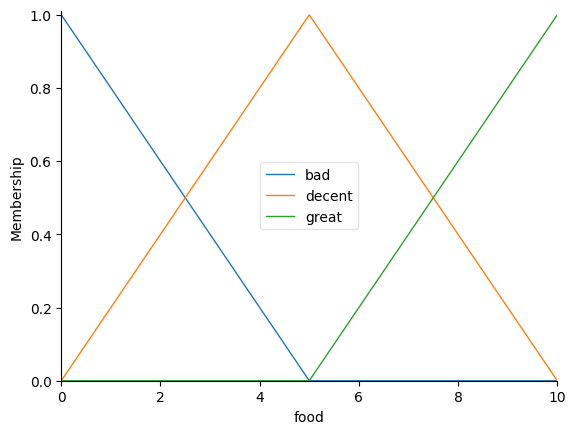

In [127]:
food.view()

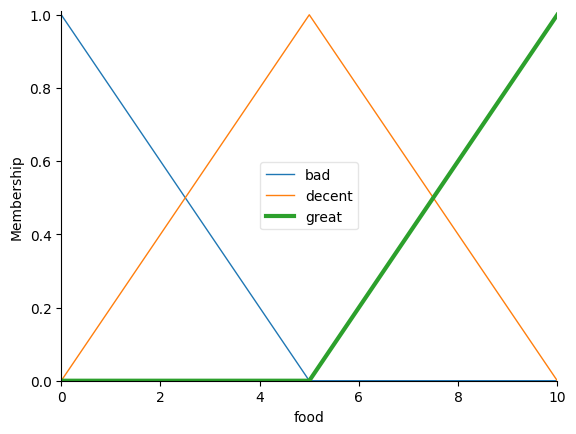

In [128]:
food['great'].view()

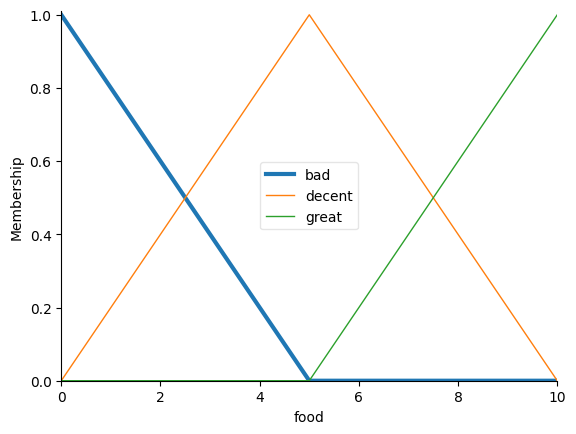

In [129]:
food['bad'].view()

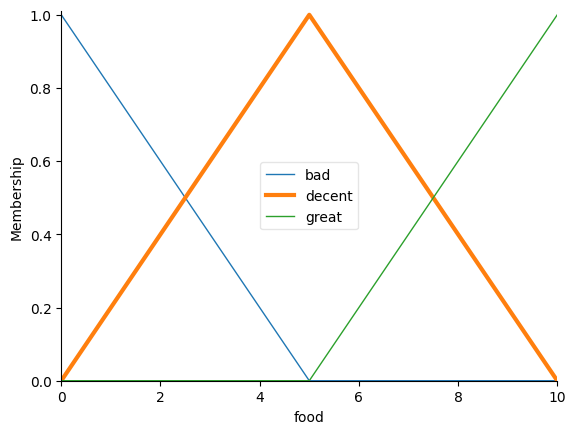

In [130]:
food['decent'].view()

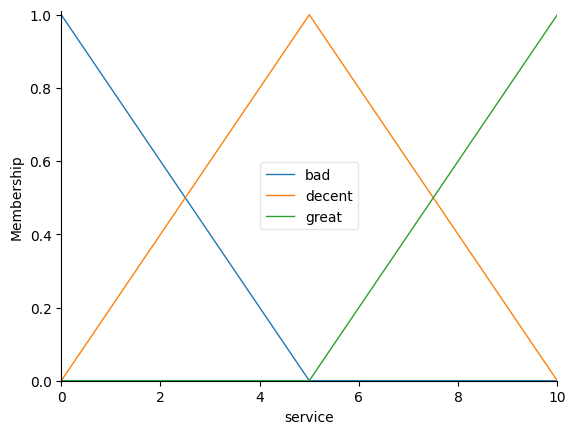

In [131]:
service.view()

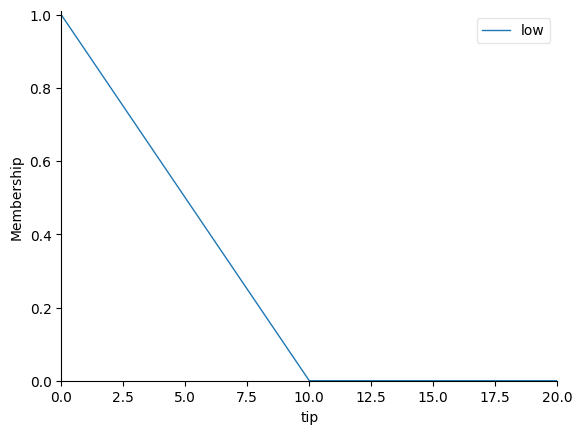

In [132]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 10])
tip.view()

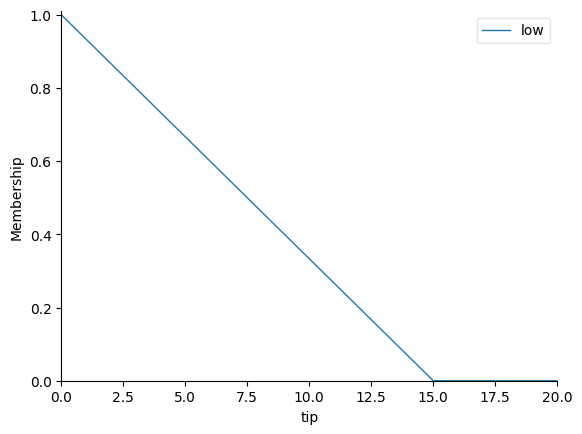

In [133]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
tip.view()

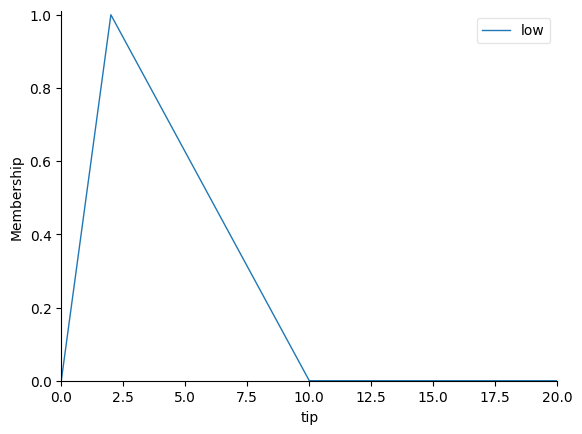

In [134]:
tip['low'] = fuzz.trimf(tip.universe, [0, 2, 10])
tip.view()

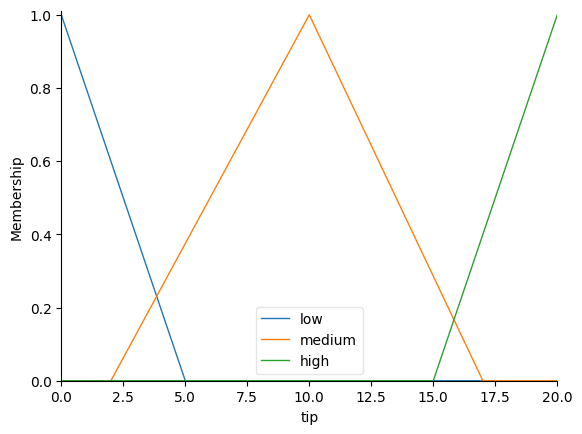

In [135]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 5])
tip['medium'] = fuzz.trimf(tip.universe, [2.0, 10, 17.0])
tip['high'] = fuzz.trimf(tip.universe, [15.0, 20, 20])
tip.view()

In [136]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['great'] | food['great'], tip['high'])

# ***V.14 : Control System....***

In [137]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

In [138]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

In [139]:
fuzzy_system.input['food'] = 4.5
fuzzy_system.input['service'] = 3.5
fuzzy_system.compute()

8.674557165861513


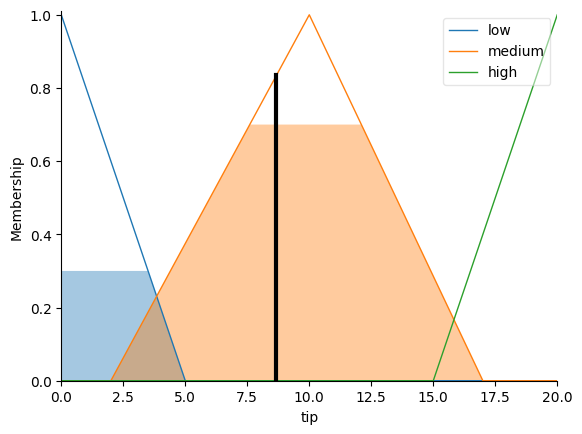

In [140]:
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)

## ***V15 : Other Functions......***

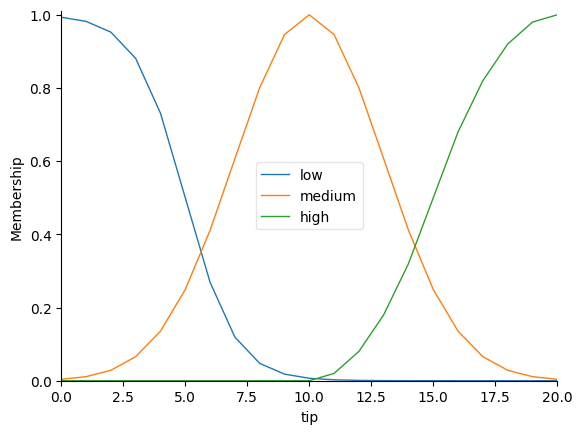

In [153]:
#sigmf means 'sigmoid function'
# gaussmf : It's a another function

tip['low'] = fuzz.sigmf(tip.universe, 5, -1)
tip['medium'] = fuzz.gaussmf(tip.universe, 10, 3)
tip['high'] = fuzz.pimf(tip.universe, 10, 20, 20, 21)
tip.view()

In [155]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['great'] | food['great'], tip['high'])

10.586333679420948


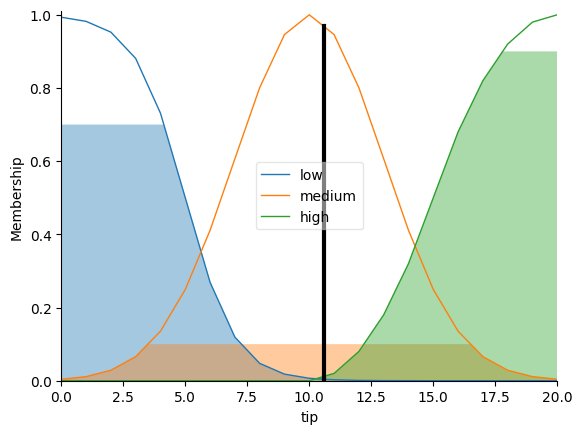

In [158]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['food'] = 1.5
fuzzy_system.input['service'] = 9.5
fuzzy_system.compute()

print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)